In [6]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv("archive.zip")

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_df = pd.concat([legit_sample, fraud], axis = 0)

In [17]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
X = new_df.drop(columns='Class', axis = 1)
Y = new_df['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [33]:
def print_evaluations(ytrue, ypred, model_name):
    print(f'Scores of the model {model_name}:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #print confusion matrixTP
    cm = confusion_matrix(ytrue, ypred)    
    disp = ConfusionMatrixDisplay(cm, display_labels=['non-fraud', 'fraud'])
    disp.plot()

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
ypred_test = lr.predict(X_test)

Scores of the model Naive predictor:
The accuracy of the model is: 0.924
The precision of the model is: 0.911
The recall of the model is: 0.939
The f1-score of the model is: 0.925


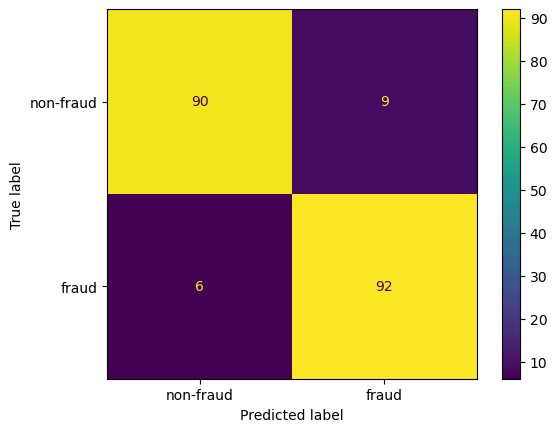

In [37]:
print_evaluations(y_test, ypred_test, "Naive predictor")

In [38]:
rf = RandomForestClassifier()

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
ypred_test = rf.predict(X_test)

Scores of the model Naive predictor:
The accuracy of the model is: 0.939
The precision of the model is: 0.939
The recall of the model is: 0.939
The f1-score of the model is: 0.939


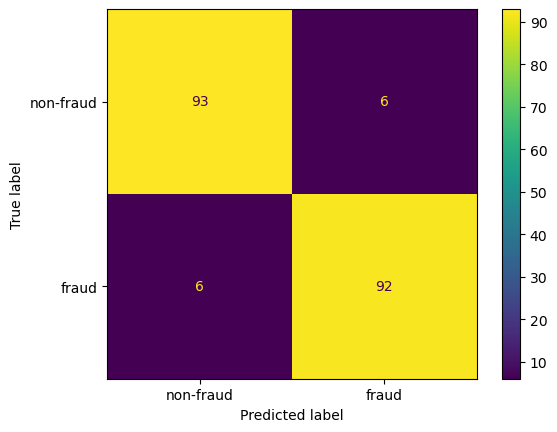

In [44]:
print_evaluations(y_test, ypred_test, "Naive predictor")